<a href="https://colab.research.google.com/github/from-iqwerty-import-IQ/Deep_Learning_Projects/blob/main/Mask%20Protocal%20Violation%20/mask_violation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content'


In [2]:
! kaggle datasets download -d alfaromeo676/face-mask-dataset


 99% 1.64G/1.66G [00:10<00:00, 151MB/s]
100% 1.66G/1.66G [00:10<00:00, 170MB/s]


In [3]:
%%capture
!unzip \*.zip && rm *.zip &> /dev/null

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from sklearn.preprocessing import LabelBinarizer

In [7]:
training_dir = '/content/Mask dataset/train'
test_dir = '/content/Mask dataset/test'

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   validation_split = 0.2)

In [33]:
train_genrator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (128,128),
    batch_size = 64,
    class_mode = 'categorical',
    subset='training',
    

)

validate_genrator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (128,128),
    batch_size = 64,
    class_mode = 'categorical',
    subset='validation',
    
)

Found 7188 images belonging to 3 classes.
Found 1794 images belonging to 3 classes.


In [34]:
model = models.Sequential()

model.add(layers.Conv2D(64,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(512,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.3))

#model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 128)     

In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['acc'],
               loss=tf.keras.losses.CategoricalCrossentropy())


In [21]:
check_point = tf.keras.callbacks.ModelCheckpoint(filepath="/content/transfer_l_mode.h5",
                                         monitor="val_acc",
                                         mode="max",
                                         save_best_only=True,)

In [36]:
trained_model = model.fit(
    train_genrator,
    validation_data= validate_genrator,
    epochs = 10,
    #steps_per_epoch=100,
    #validation_steps=33,
    #callbacks = [check_point]
    )

Epoch 1/10
113/113 [==============================] - 79s 694ms/step - loss: 0.4588 - acc: 0.8116 - val_loss: 0.1979 - val_acc: 0.9298
Epoch 2/10
113/113 [==============================] - 76s 677ms/step - loss: 0.1889 - acc: 0.9354 - val_loss: 0.1331 - val_acc: 0.9576
Epoch 3/10
113/113 [==============================] - 75s 662ms/step - loss: 0.1670 - acc: 0.9392 - val_loss: 0.1400 - val_acc: 0.9493
Epoch 4/10
113/113 [==============================] - 75s 663ms/step - loss: 0.1472 - acc: 0.9494 - val_loss: 0.1551 - val_acc: 0.9443
Epoch 5/10
113/113 [==============================] - 75s 665ms/step - loss: 0.1262 - acc: 0.9559 - val_loss: 0.1287 - val_acc: 0.9593
Epoch 6/10
113/113 [==============================] - 76s 669ms/step - loss: 0.1164 - acc: 0.9609 - val_loss: 0.0843 - val_acc: 0.9716
Epoch 7/10
113/113 [==============================] - 75s 664ms/step - loss: 0.1218 - acc: 0.9573 - val_loss: 0.0835 - val_acc: 0.9749
Epoch 8/10
113/113 [==============================] - 7

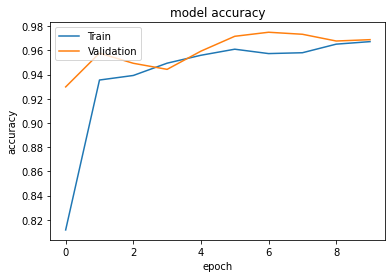

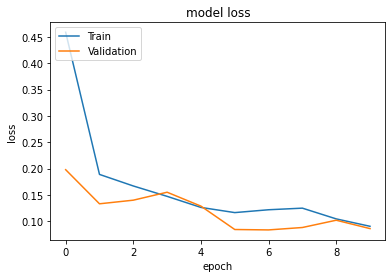

In [37]:
plt.plot(trained_model.history['acc'])
plt.plot(trained_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [38]:
model.evaluate(validate_genrator)

29/29 [==============================] - 15s 514ms/step - loss: 0.0891 - acc: 0.9688


[0.08909004926681519, 0.9687848091125488]

# Unknown data 

In [39]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [40]:
test_genrator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (128,128),
    batch_size = 20,
    class_mode = 'categorical',
    #subset='validation',
    
)

Found 1087 images belonging to 3 classes.


In [41]:
model.evaluate(test_genrator)

55/55 [==============================] - 26s 469ms/step - loss: 1.1244 - acc: 0.7249


[1.1243897676467896, 0.724931001663208]

In [52]:
model.save("/content/mask_detection_open.h5")

In [53]:
!wget 'https://i.mmo.cm/is/image/mmoimg/mw-product-zoom/mephisto-half-mask-black--mw-117541-2.jpg'

--2021-12-29 06:44:07--  https://i.mmo.cm/is/image/mmoimg/mw-product-zoom/mephisto-half-mask-black--mw-117541-2.jpg
Resolving i.mmo.cm (i.mmo.cm)... 23.53.34.58, 23.53.34.34, 2600:1405:1800::6867:452b, ...
Connecting to i.mmo.cm (i.mmo.cm)|23.53.34.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145876 (142K) [image/jpeg]
Saving to: ‘mephisto-half-mask-black--mw-117541-2.jpg’

mephisto-half-mask- 100%[===================>] 142.46K  --.-KB/s    in 0.02s   

2021-12-29 06:44:07 (8.80 MB/s) - ‘mephisto-half-mask-black--mw-117541-2.jpg’ saved [145876/145876]



In [56]:
img = input()

/content/mephisto-half-mask-black--mw-117541-2.jpg


In [44]:
from keras.preprocessing import image

[[0. 1. 0.]]


'no mask'

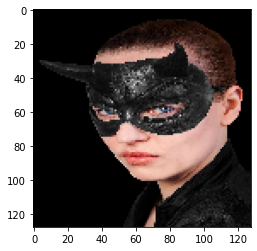

In [57]:
img = image.load_img(img, target_size=(128, 128,3))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
pre = model.predict(img)
print(pre)
class_name = ['improper mask ','no mask',' mask']
class_name[np.argmax(pre)]